In [1]:
import osmnx as ox
import networkx as nx
from matplotlib import pyplot as plt
import math
import utm
import dml

In [2]:
G = ox.graph_from_place('Boston, Massachusetts, USA', network_type='drive')

In [4]:
graph_project = ox.project_graph(G)

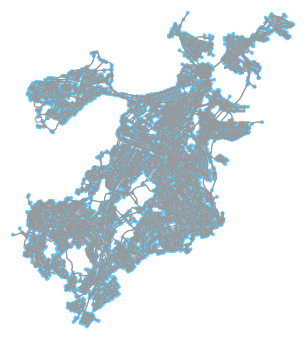

(<matplotlib.figure.Figure at 0x126500198>,
 <matplotlib.axes._subplots.AxesSubplot at 0x126500b00>)

In [5]:
ox.plot_graph(graph_project)

In [6]:
orig_xy = (42.367027, -71.062034)
target_xy = (42.363128, -71.05817)

In [7]:
proj_orig_xy = utm.from_latlon(orig_xy[0], orig_xy[1])
proj_target_xy = utm.from_latlon(target_xy[0], target_xy[1])
input_orig_xy = (proj_orig_xy[1], proj_orig_xy[0])
input_target_xy = (proj_target_xy[1], proj_target_xy[0])
print(input_orig_xy, input_target_xy)

(4692587.50864284, 330208.6704979583) (4692146.84060489, 330516.3668618748)


In [8]:
orig_node = ox.get_nearest_node(graph_project, input_orig_xy, return_dist=True, method='euclidean')
print(orig_node)

(61487478, 97.546114514119722)


In [9]:
target_node = ox.get_nearest_node(graph_project, input_target_xy, return_dist=True, method='euclidean')
print(target_node)

(621510944, 34.258452783442237)


In [10]:
route = nx.shortest_path(G=G, source=orig_node[0], target=target_node[0], weight='length')
print(route)

[61487478, 61357894, 61350635, 61350637, 61445832, 661035203, 61473920, 61473806, 621510944]


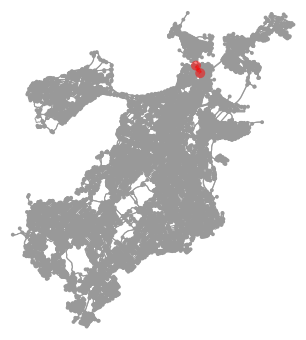

In [11]:
fig,ax = ox.plot_graph_route(graph_project, route)

In [15]:
# mongo
client = dml.pymongo.MongoClient()
repo = client.repo
repo.authenticate('aoconno8_dmak1112_ferrys', 'aoconno8_dmak1112_ferrys')

True

In [16]:
def project(R, p):
    return [p(t) for t in R]

In [21]:
# lights
streetlights_in_radius_cursor = repo.aoconno8_dmak1112_ferrys.streetlights_in_radius.find()
streetlights_in_radius = project(streetlights_in_radius_cursor, lambda t: t)
print(streetlights_in_radius)

[{'_id': ObjectId('5abaf309e725693002834408'), 'alc_coord': [42.3692572, -71.02613529999999], 'mbta_coords': [[42.368023, -71.029231], [42.365634, -71.02887], [42.366524, -71.030532]], 'streetlights': [{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-71.0301621326, 42.3662603292]}, 'properties': {}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-71.03051391439999, 42.366533122199996]}, 'properties': {}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-71.0297266624, 42.366229694299996]}, 'properties': {}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-71.0314205957, 42.3695661394]}, 'properties': {}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-71.03140618350001, 42.369585101999995]}, 'properties': {}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-71.0309949144, 42.3692579783]}, 'properties': {}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-

In [25]:
for streetlights in streetlights_in_radius:
    alc_coord = streetlights['alc_coord']
    mbta_coords = streetlights['mbta_coords']
    streetlights_list = streetlights['streetlights']
    
    for streetlight in streetlights_list:
        streetlight_coord = streetlight['geometry']['coordinates']
        proj_streetlight_coord = utm.from_latlon(streetlight_coord[1], streetlight_coord[0])
        input_streetlight_coord = (proj_streetlight_coord[1], proj_streetlight_coord[0])
        nearest_node_streetlight = ox.get_nearest_node(graph_project, input_streetlight_coord, return_dist=True, method='euclidean')
        print(nearest_node_streetlight)

(61468139, 11.686761791093353)
(61519397, 12.013709194939455)
(61468139, 43.304794681037563)
(61582370, 55.779706151865128)
(61582370, 56.372187948134624)
(61582370, 101.70361964682934)
(5351504517, 122.66194361318742)
(2068577899, 132.11096649808405)
(2068577899, 103.7816784157759)
(61406650, 87.054459500323745)
(5351504517, 147.26985713644945)
(5351504517, 149.22798206441107)
(5351504517, 140.94902559893859)
(2072248321, 128.07120131551218)
(61582370, 50.357198301669065)
(61582370, 31.637867478432423)
(61582370, 55.475613894351454)
(61582370, 99.655879213079544)
(2068577899, 134.52036568128446)
(61406650, 107.40394798347445)
(2938498072, 141.07200879593702)
(2938498072, 138.25543351647644)
(2938498072, 147.88969054370702)
(2938498072, 135.6426306823675)
(2072248321, 80.999409427622311)
(2072248321, 101.70983405896321)
(2072248321, 132.53353400833157)
(2068577899, 149.45107742622909)
(2938498072, 113.06137090826348)
(2938498072, 112.17312206098815)
(2938498072, 111.76772063618749)
(20

(2075057164, 44.131245541588264)
(2075057164, 34.020808421776053)
(2075057164, 57.281448758614886)
(2075057164, 66.58220956508147)
(2075057164, 77.638481741934982)
(61406876, 32.099946957894282)
(61406876, 34.253276061681809)
(61452121, 120.76466973070293)
(61452121, 116.89322334533534)
(61452121, 127.99706684940533)
(61441541, 65.545572784053306)
(61477210, 132.30848913675345)
(61350276, 123.34519003723084)
(61350276, 128.77465017165773)
(61350276, 85.480648182415237)
(61477210, 26.949634845261674)
(61408808, 41.930039431944579)
(61408808, 67.992583802482756)
(61350276, 57.750884767499478)
(61350276, 89.882763953539737)
(61350276, 79.011066764211591)
(61350276, 80.055575887986024)
(61350276, 43.693442205043205)
(61350276, 42.368891519180771)
(61408808, 35.681090558234345)
(61408808, 34.144253977566279)
(61408808, 39.140682230330739)
(61408808, 36.54703274271565)
(61477210, 31.016165537851812)
(61477210, 12.800891057461769)
(61477210, 21.391914506333602)
(61477210, 40.087337515784469)


(2075527046, 14.868289182226912)
(61441555, 9.991407993882472)
(61481383, 26.298520999054087)
(1102741801, 35.271703249479266)
(61603490, 14.426523034123537)
(61441533, 19.389048514851719)
(61441533, 9.0402173650749518)
(61441533, 26.424155869500954)
(61441533, 63.626771199687596)
(61441541, 37.811985494431752)
(61441541, 13.527883843484835)
(61441541, 41.00150788227382)
(61441541, 35.399293711540977)
(61441541, 13.352800558601828)
(61441533, 31.437155807214584)
(61441533, 65.793991558018902)
(61441541, 70.962843291332945)
(61441541, 84.704705480533349)
(61443294, 88.577448467417099)
(61441541, 40.424399349871749)
(61441541, 44.162216104419677)
(61441541, 17.546936551098572)
(61441541, 62.547113545636485)
(61441541, 58.877188623346186)
(61441533, 57.679472032102325)
(61441533, 38.57508695828276)
(61441533, 29.998103395013356)
(61429075, 43.556716929164764)
(61429075, 26.821859580641263)
(61441533, 84.549682506141039)
(61406650, 73.066673705840273)
(61441533, 68.973495619893257)
(614415